In [158]:
import pandas as pd
import re
import nltk

In [159]:
train=pd.read_csv("./train.csv")

In [160]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [161]:
X=train.drop('label',axis=1)

In [162]:

X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [165]:
X.isnull()

,id,title,author,text
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
20795,False,False,False,False
20796,False,False,False,False
20797,False,False,False,False
20798,False,False,False,False


In [124]:
y=train['label']

In [125]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [126]:
from sklearn.feature_extraction.text import CountVectorizer

In [127]:
train=train.dropna()

In [128]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [129]:
main=train.copy()

In [130]:
main.reset_index(inplace=True)

In [131]:
main.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [132]:
main['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [133]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(main)):
    review = re.sub('[^a-zA-Z]', ' ', main['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [134]:
corpus[2]


'truth might get fire'

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [136]:
X.shape

(18285, 5000)

In [137]:
y=main['label']


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [139]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [140]:
import matplotlib.pyplot as plt

In [141]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB

In [142]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [143]:

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


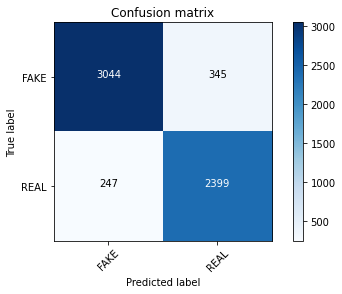

In [144]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [145]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9019055509527755

## Neural_Network

In [146]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [147]:
inputs =keras.Input(shape=(5000))
x=layers.Dense(1024,activation='relu')(inputs)
x=layers.BatchNormalization()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.BatchNormalization()(x)
x=layers.Dense(16,activation='relu')(x)
output=layers.Dense(1,activation="softmax")(x)

In [148]:
model=keras.Model(inputs=inputs,outputs=output)

In [149]:
model.compile(
loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

In [150]:
model.fit(X_train,y_train,batch_size=32,epochs=3,verbose=2)
model.evaluate(X_test,y_test,batch_size=32,verbose=2)

Epoch 1/3
383/383 - 12s - loss: 0.0000e+00 - accuracy: 0.4309
Epoch 2/3
383/383 - 12s - loss: 0.0000e+00 - accuracy: 0.4309
Epoch 3/3
383/383 - 12s - loss: 0.0000e+00 - accuracy: 0.4309
189/189 - 1s - loss: 0.0000e+00 - accuracy: 0.4384


[0.0, 0.4384424090385437]

## Testing

In [151]:
test=pd.read_csv("./test.csv")

In [167]:
test.shape

(5200, 4)

In [168]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [157]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(main)):
    review = re.sub('[^a-zA-Z]', ' ', test['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

TypeError: expected string or bytes-like object

prediction=classifier.predict(test)